In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## **Exploring Data**

In [37]:
data = pd.read_csv("Otherdata/bank-full.csv",sep=";")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

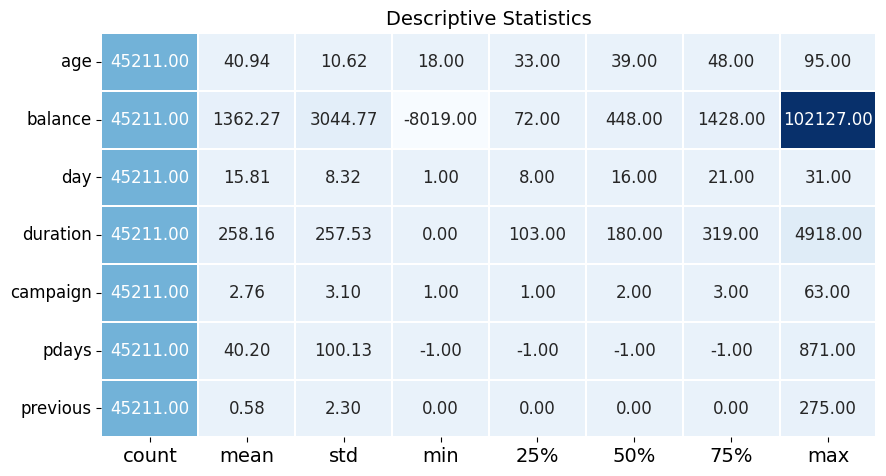

In [40]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [41]:
print("Total nulls:")
data.isnull().sum()

Total nulls:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
# Calculate the count of 'unknown' and 'other' in the 'poutcome' column
unknown_count = (data['poutcome'] == 'unknown').sum()
other_count = (data['poutcome'] == 'other').sum()

# Calculate the total count of values in the 'poutcome' column
total_count = len(data)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown = (unknown_count / total_count) * 100
percentage_other = (other_count / total_count) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown)
print("Percentage of 'other' in poutcome:", percentage_other)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [43]:
# Drop the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [44]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")


Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: contact, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [45]:
data = data.drop(4)

## **Data Plots**

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

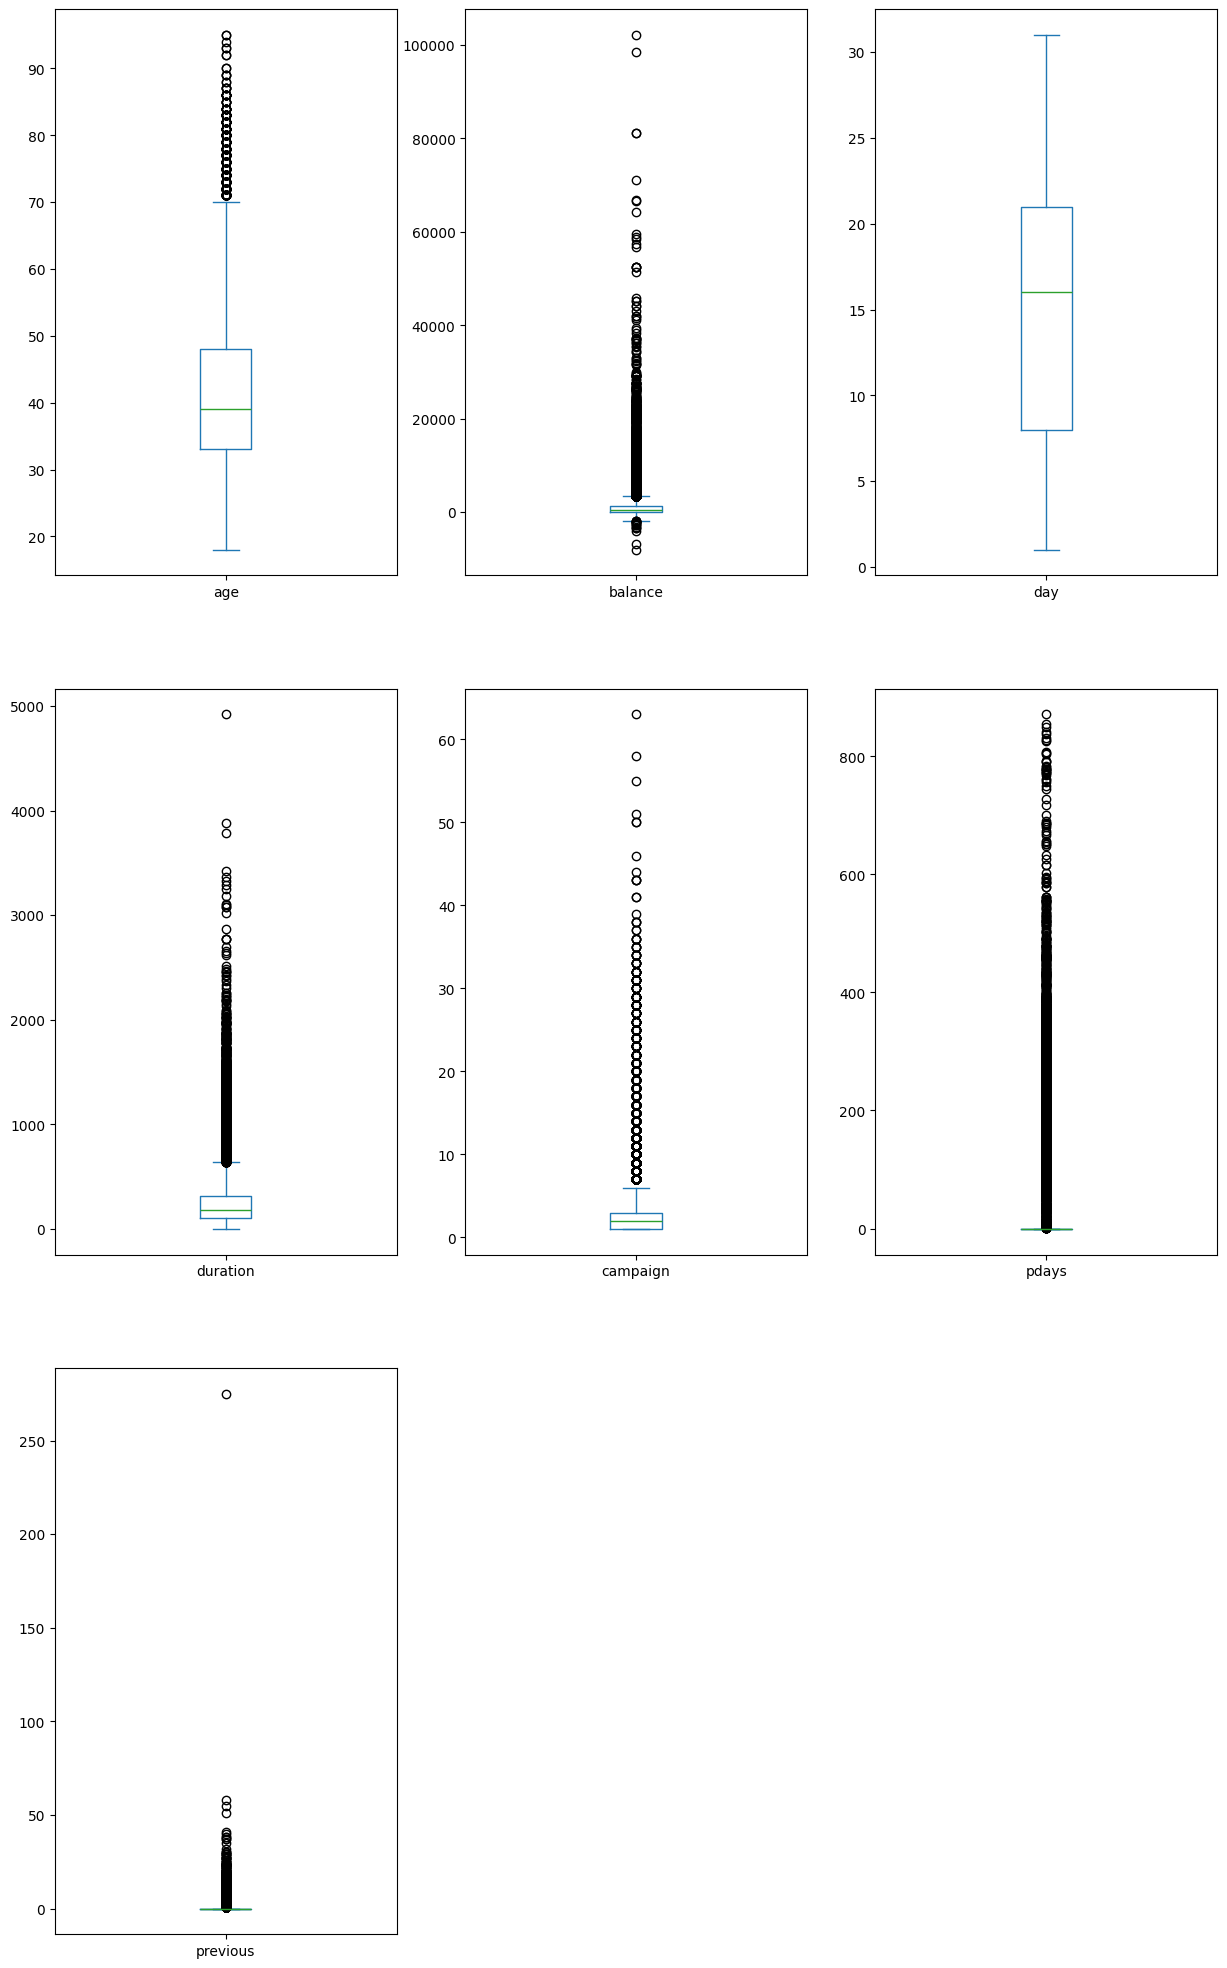

In [46]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

In [47]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [48]:
data = remove_outliers(data, 'age')
data = remove_outliers(data, 'balance')
data = remove_outliers(data, 'duration')
data = remove_outliers(data, 'campaign')
data = remove_outliers(data, 'previous')

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

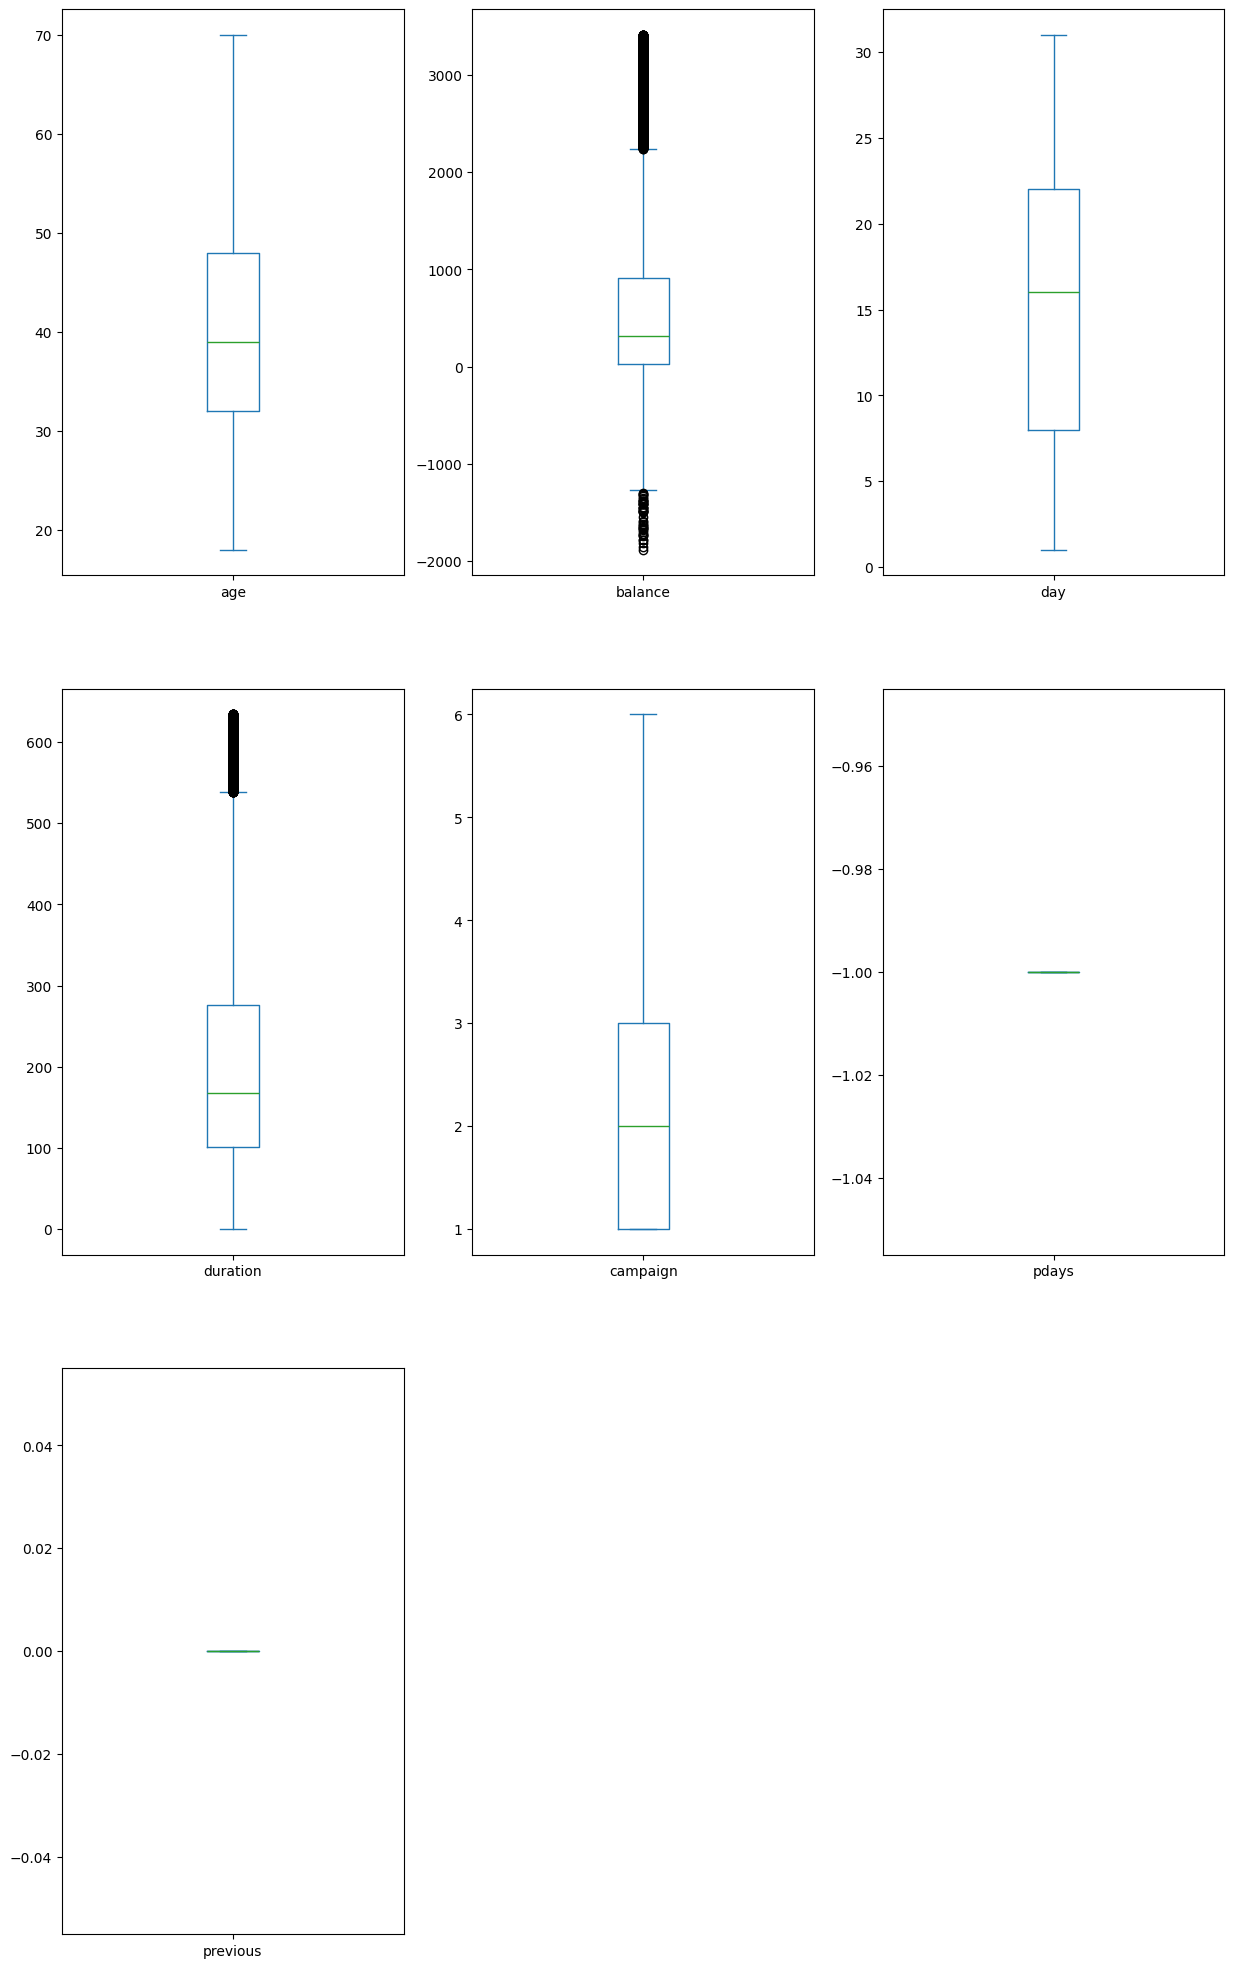

In [49]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

In [50]:
data.shape

(28068, 16)

# **EDA for Bank Full**

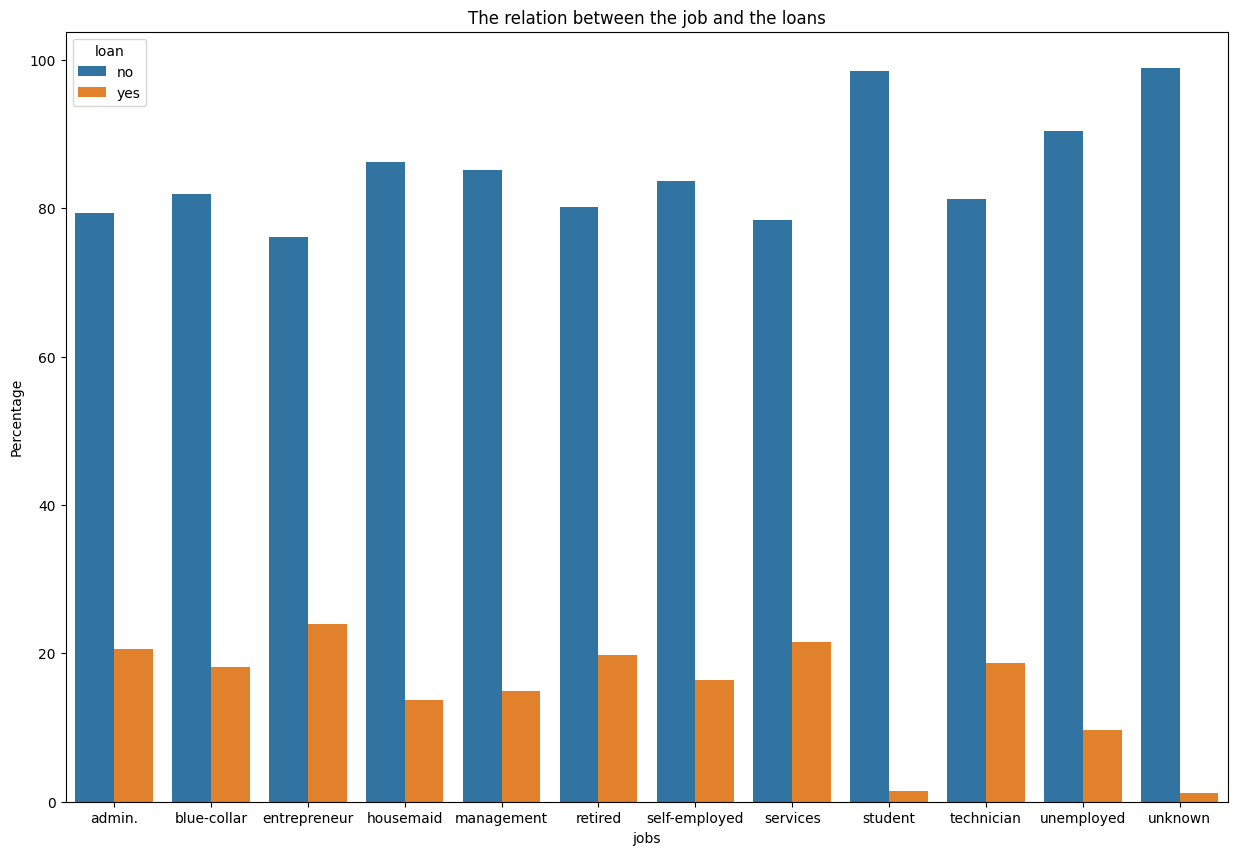

In [51]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

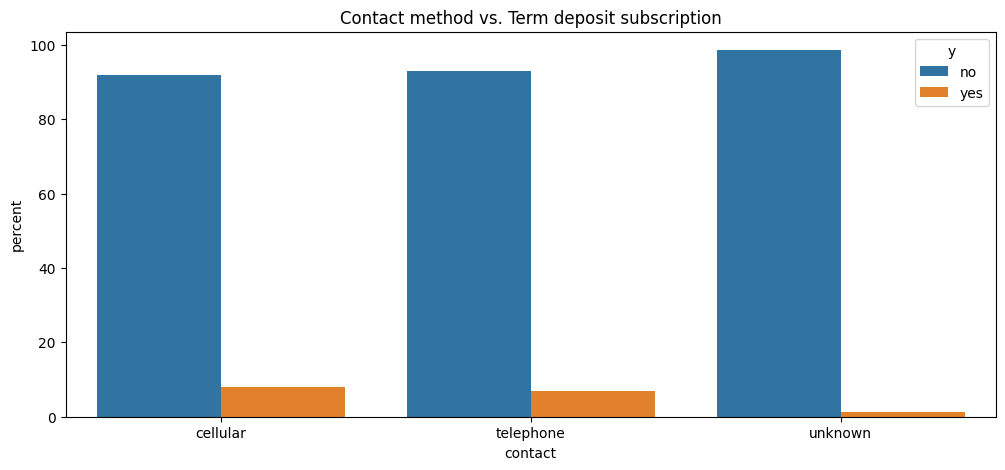

In [52]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
plt.title("Contact method vs. Term deposit subscription")
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.show()

C:\Users\rbrul\AppData\Local\Temp\ipykernel_29092\1645057988.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



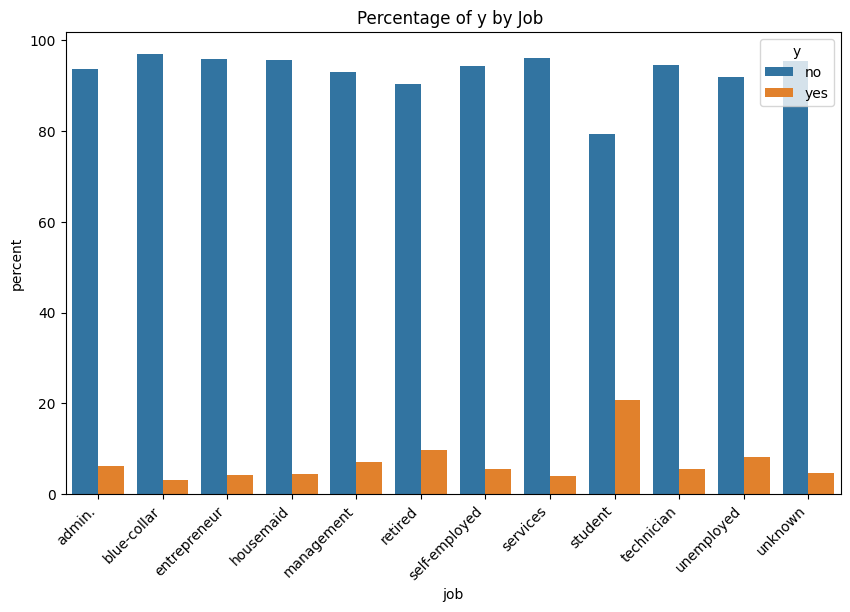

In [53]:
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

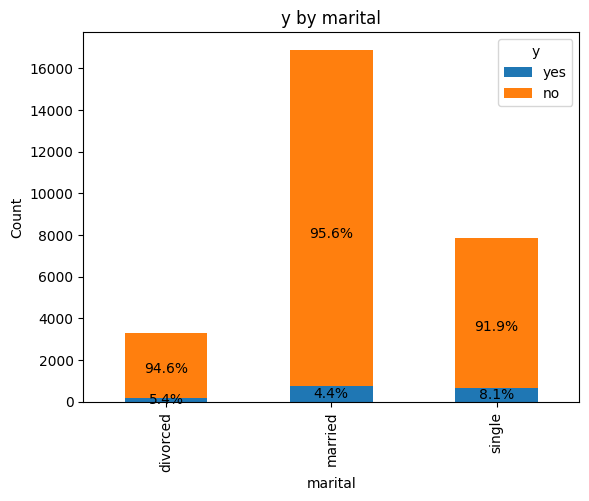

In [54]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

In [55]:
fig = px.histogram(data, x='duration', color='y')
fig.update_layout(title='Duration Vs. Y')
fig.show()

In [56]:
fig = px.histogram(data,x='balance',color='y')
fig.update_layout(title='Balance Vs. Y')
fig.show()

In [57]:
fig = px.histogram(data,x='age',color='y')
fig.update_layout(title='Age Vs. Y')
fig.show()

In [58]:

grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')


percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)


grouped_df['percentages'] = percentages


fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))
fig.update_layout(title='Housing Loans')

fig.show()


In [59]:
fig = px.histogram(data, x="y",color = 'education')
fig.update_layout(title='Education Vs. Y')
fig.show()

Text(0.5, 1.0, "Distribution of 'default' by 'y'")

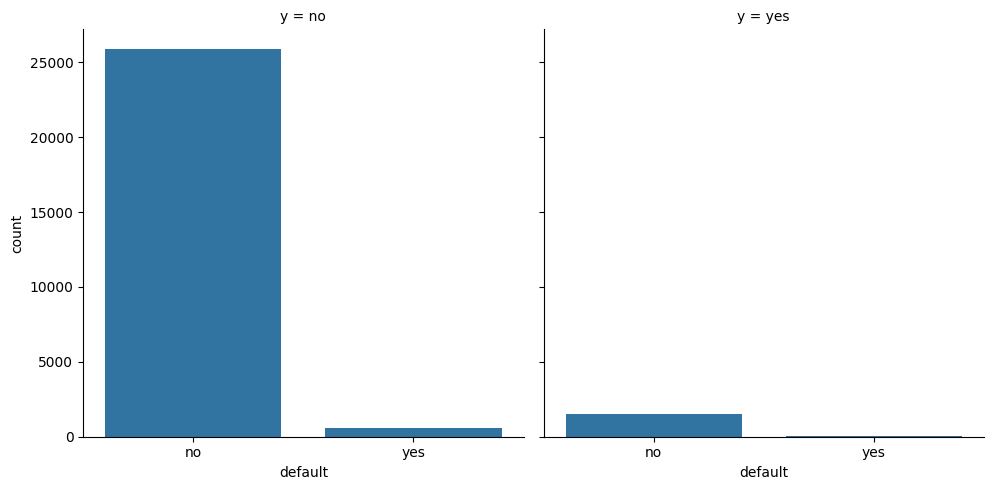

In [60]:
sns.catplot(data=data , x="default" , col="y",kind='count')
ax.set_title("Distribution of 'default' by 'y'")

# **Preprocessing Bank-Full-Additional**

In [71]:
data = pd.read_csv("Otherdata/bank-additional-full.csv",sep=";")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

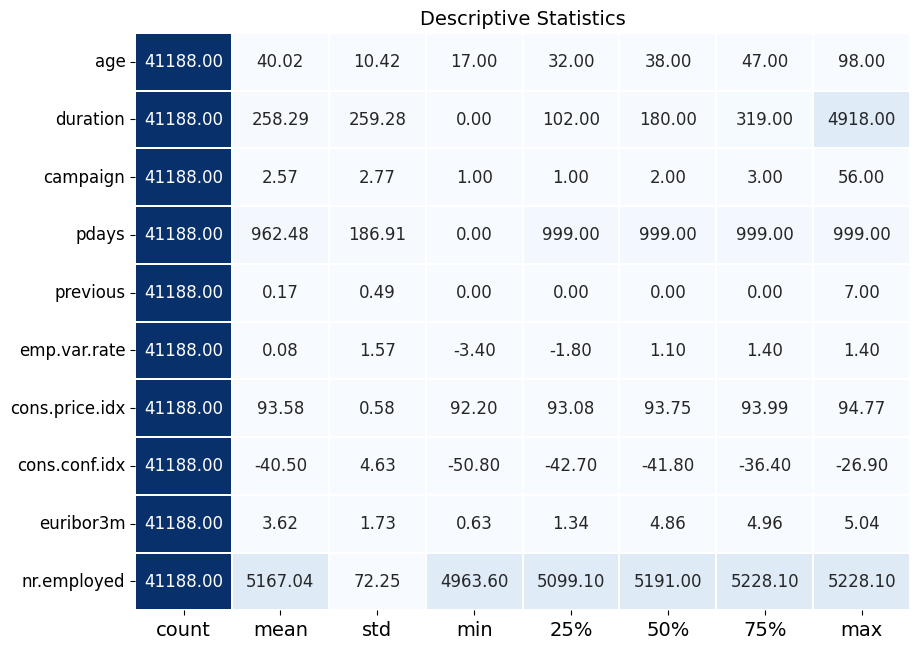

In [74]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [75]:
print("Total nulls:")
data.isnull().sum()

Total nulls:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [76]:
# Drop the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [77]:
# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0        0.0
1        5.0
2        0.0
3        0.0
4        0.0
        ... 
41183    0.0
41184    0.0
41185    0.0
41186    0.0
41187    0.0
Length: 41188, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: default, Percentage: 20.87%

Row with the highest percentage of 'unknown' values:
Row: 2723, Pe

In [78]:
data = data.drop(2723)

# **Outlier Removal**

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

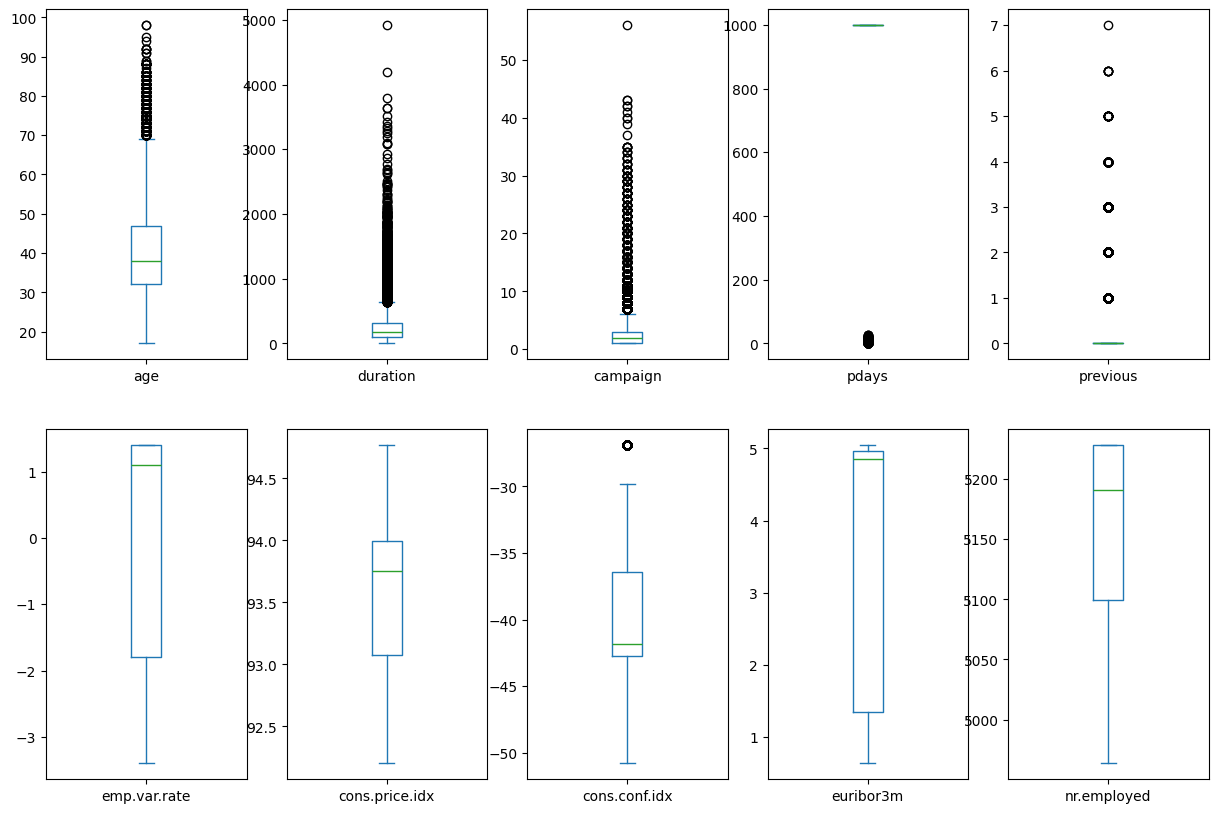

In [80]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))


In [84]:
data = remove_outliers(data, 'age')
data = remove_outliers(data, 'duration')
data = remove_outliers(data, 'campaign')
data = remove_outliers(data, 'previous')

age                  Axes(0.125,0.53;0.133621x0.35)
duration          Axes(0.285345,0.53;0.133621x0.35)
campaign           Axes(0.44569,0.53;0.133621x0.35)
pdays             Axes(0.606034,0.53;0.133621x0.35)
previous          Axes(0.766379,0.53;0.133621x0.35)
emp.var.rate         Axes(0.125,0.11;0.133621x0.35)
cons.price.idx    Axes(0.285345,0.11;0.133621x0.35)
cons.conf.idx      Axes(0.44569,0.11;0.133621x0.35)
euribor3m         Axes(0.606034,0.11;0.133621x0.35)
nr.employed       Axes(0.766379,0.11;0.133621x0.35)
dtype: object

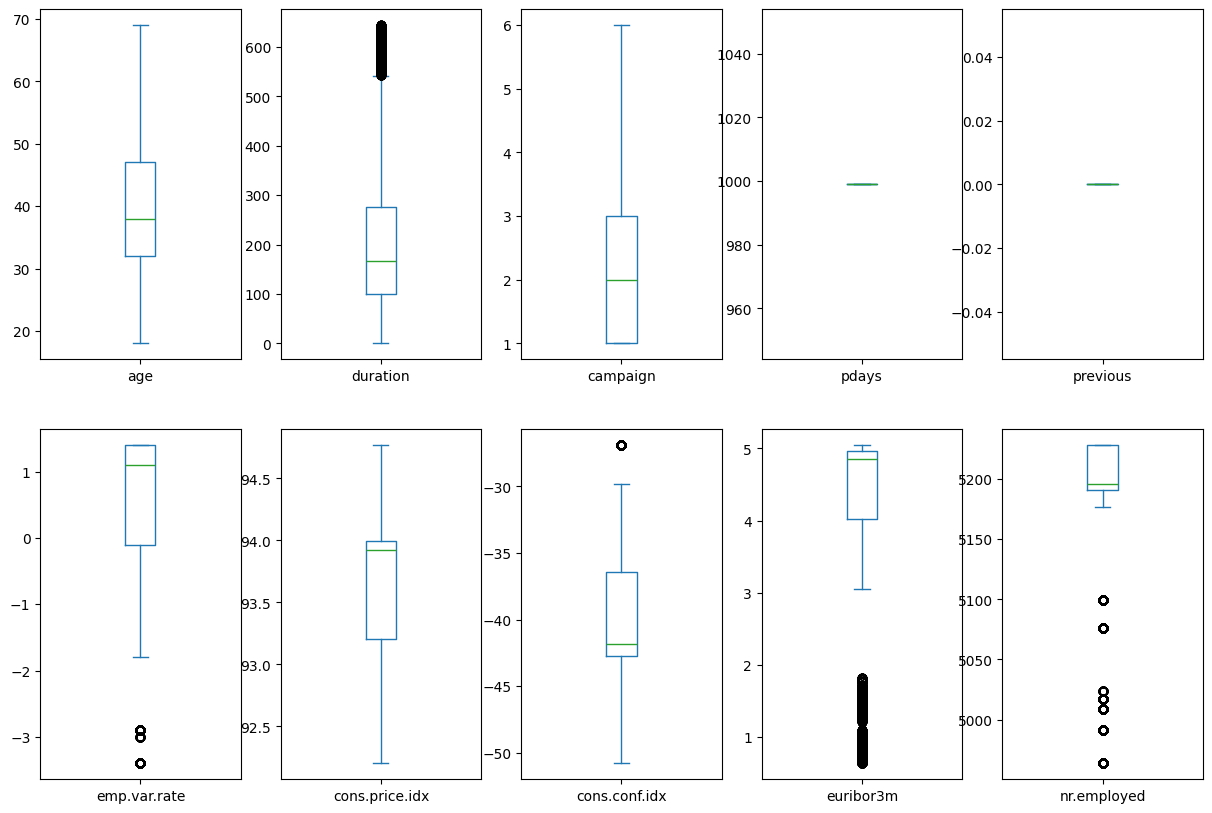

In [85]:
data.plot(kind="box", subplots=True, figsize=(15, 10), layout=(2, 5))

In [86]:
data.shape

(30572, 20)

# **EDA Bank-Additional**

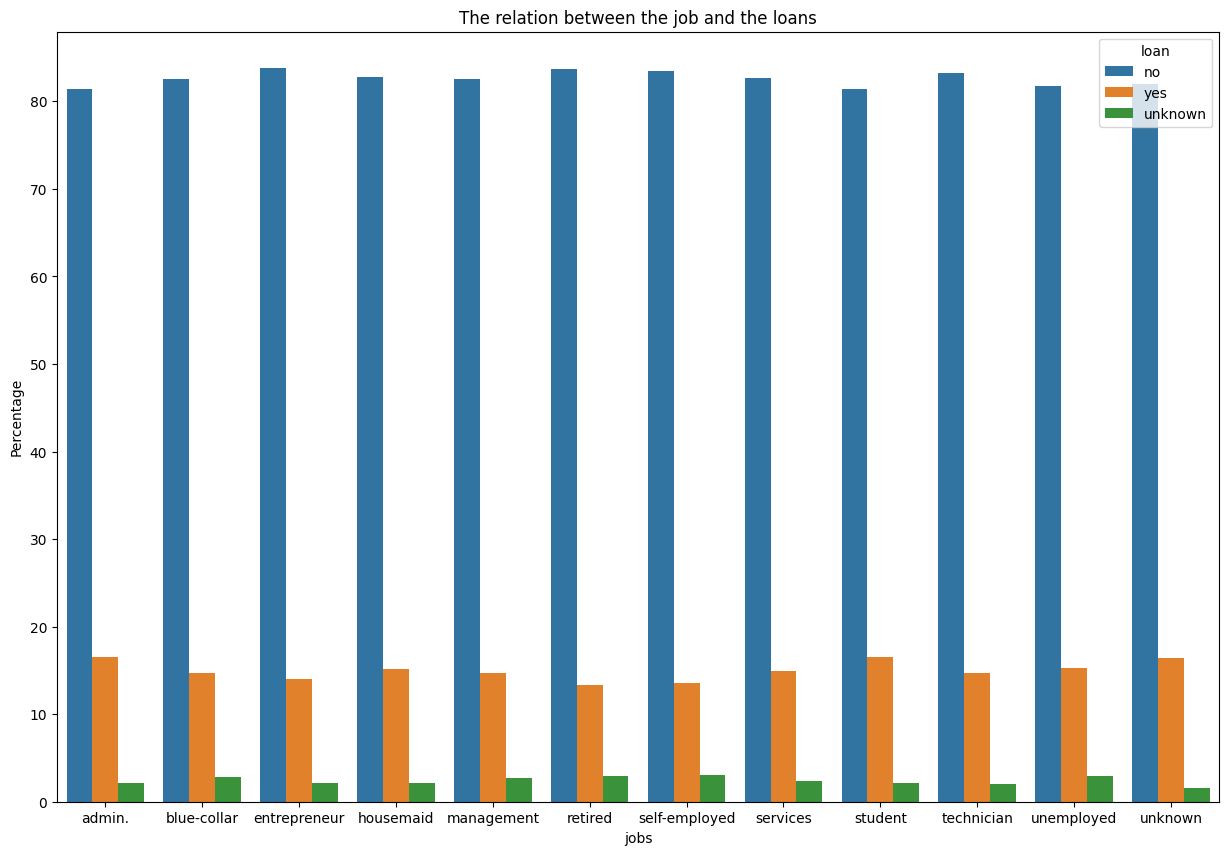

In [87]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

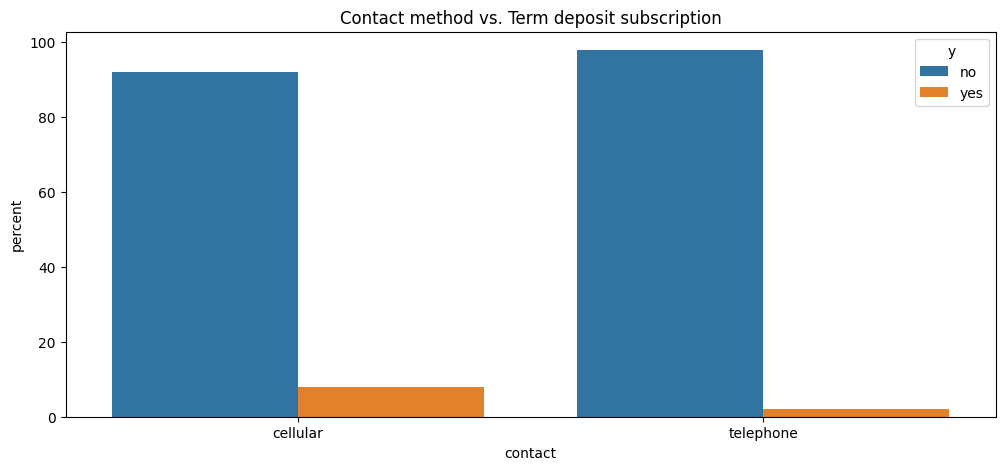

In [88]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
plt.title("Contact method vs. Term deposit subscription")
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages)

plt.show()

C:\Users\rbrul\AppData\Local\Temp\ipykernel_29092\1645057988.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



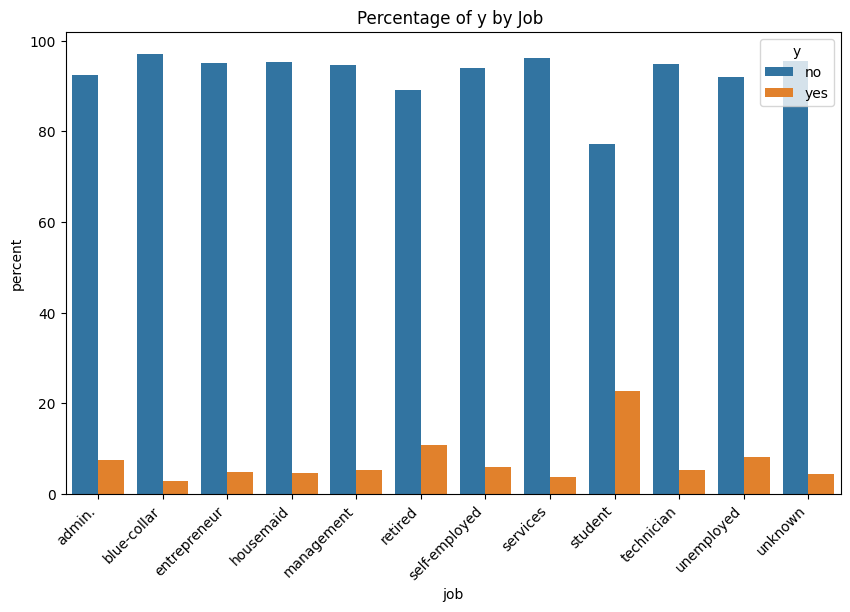

In [89]:
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

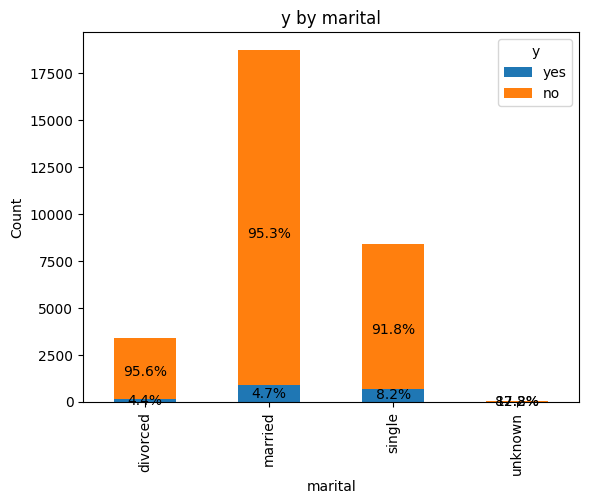

In [90]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

In [91]:
fig = px.histogram(data, x='duration', color='y')
fig.update_layout(title='Duration Vs. Y')
fig.show()

In [92]:
fig = px.histogram(data,x='age',color='y')
fig.update_layout(title='Age Vs. Y')
fig.show()

In [93]:

grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')


percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)


grouped_df['percentages'] = percentages


fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))
fig.update_layout(title='Housing Loans')

fig.show()

In [94]:
fig = px.histogram(data, x="y",color = 'education')
fig.update_layout(title='Education Vs. Y')
fig.show()

Text(0.5, 1.0, "Distribution of 'default' by 'y'")

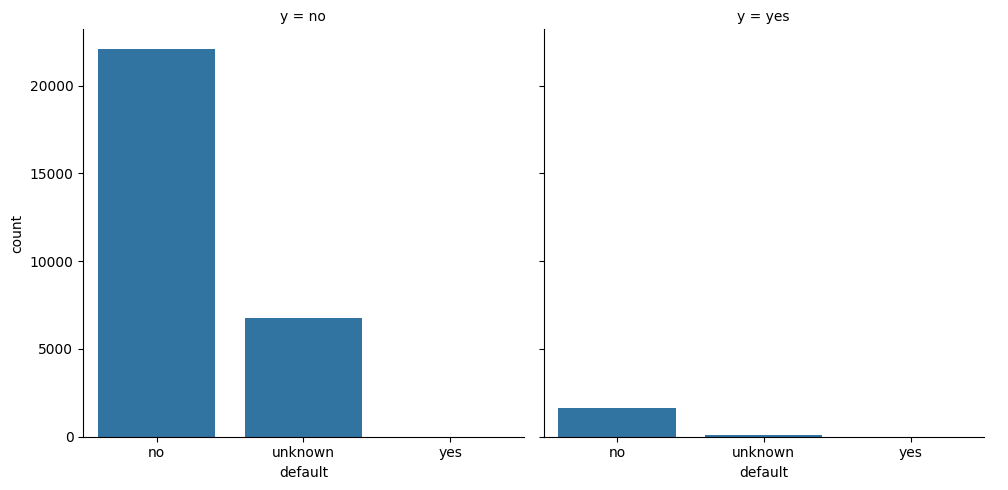

In [97]:
sns.catplot(data=data , x="default" , col="y",kind='count')
ax.set_title("Distribution of 'default' by 'y'")